In [168]:
import os
import glob
import shutil 
import numpy as np 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

## Get Data

In [169]:
cluster_dir = Path('/Users/carlydrzewiecki/Desktop/trainor_cluster')

In [170]:
sample_data = pd.read_csv(cluster_dir/'7170_INT, dlc.csv', header=None)

## Clean data

In [171]:
### sweep sweep sweep, data clean up

### Rename the columns based on the multi-index set up

for i in range(1, len(sample_data.columns)):
    j = sample_data.iloc[1:4, i:i+1].values
    col_name = str(j[0])+'_'+str(j[1])+'_'+str(j[2])
    col_name = col_name.replace('[', '').replace(']', '').replace("'", '')
    sample_data.rename(columns={i:col_name}, inplace=True)

#Reformat the sample data, remove the multi-index rows
sample_data = sample_data.iloc[4:, :]
sample_data.rename(columns={0:'frame'}, inplace=True)

#Convert the data to floats
sample_data = sample_data.astype(float)

#Replace all instances of individual1 in column names with test_subject
sample_data.columns = sample_data.columns.str.replace('individual1', 'testsubject')
sample_data.columns = sample_data.columns.str.replace('individual2', 'intruder')

#reset the index
sample_data = sample_data.reset_index(drop=True)


In [172]:
sample_data

,frame,testsubject_nose_x,testsubject_nose_y,testsubject_nose_likelihood,testsubject_rightear_x,testsubject_rightear_y,testsubject_rightear_likelihood,testsubject_leftear_x,testsubject_leftear_y,testsubject_leftear_likelihood,...,intruder_rightleg_likelihood,intruder_leftleg_x,intruder_leftleg_y,intruder_leftleg_likelihood,intruder_tailbase_x,intruder_tailbase_y,intruder_tailbase_likelihood,intruder_tailtip_x,intruder_tailtip_y,intruder_tailtip_likelihood
0,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,6826.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,670.136,605.596,1.0,682.163,595.582,1.000,NaN,NaN,0.0
6827,6827.0,731.882,716.036,0.256,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,670.130,605.110,1.0,682.734,596.434,1.000,NaN,NaN,0.0
6828,6828.0,731.953,708.083,0.129,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,670.073,602.540,1.0,677.446,595.933,0.999,NaN,NaN,0.0
6829,6829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,671.823,607.375,1.0,683.034,597.787,1.000,NaN,NaN,0.0


In [42]:
#sample_data.iloc[2360:2375, :]



0        10.903587
1        42.044571
2              NaN
3              NaN
4         6.219711
           ...    
6826     79.273741
6827     55.692605
6828    479.064844
6829           NaN
6830     78.346724
Length: 6831, dtype: float64


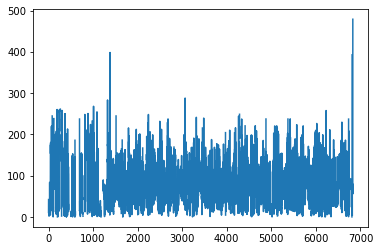

In [6]:
location_var = sample_data.filter(regex='^testsubject.*_y$').std(axis=1)
print(location_var)

locations_to_drop = location_var > 150
#sample_data[location_var,:] = np.nan()
plt.plot(location_var)


In [7]:
col_names = sample_data.columns

body_parts = []

for i, data in enumerate(col_names):
    if i > 0:
        if data.split('_')[1] not in body_parts:
            body_parts.append(data.split('_')[1])

In [8]:
#body_parts

## Calculate distances between dlc markers

In [68]:
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def get_distance_between_mice(df, sub1, body_part1, sub2, body_part2):
    series = euclidean_distance(df[sub1+'_'+body_part1+'_x'], df[sub1+'_'+body_part1+'_y'], 
    df[sub2+'_'+body_part2+'_x'], df[sub2+'_'+body_part2+'_y'])
    dist_df = pd.DataFrame(series)
    return dist_df



In [64]:
#between centroid distance (Falkner does this from top view)
get_distance_between_mice(sample_data, 'testsubject', 'midpoint', 'intruder', 'midpoint')

#distance between test subject rear and intruder nose
get_distance_between_mice(sample_data, 'testsubject', 'tailbase', 'intruder', 'nose')

#distance between test subject nose and intruder nose
get_distance_between_mice(sample_data, 'testsubject', 'nose', 'intruder', 'nose')

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6826           NaN
6827    200.439930
6828    196.993567
6829           NaN
6830    201.345695
Length: 6831, dtype: float64

In [67]:
### Someone should double check my math here
### ALSO I am making the assumption that the edges of the video correspond to the edges of the arena

### SHOULD BE READING FROM A DICT OF THE ARENA DIMENSIONS FOR EACH ANIMAL. 
#### cage_dim = {'sub1': {'left': 0, 'right': 1173, 'bottom': 0} ... }

def get_distance_between_edge(df, sub1, body_part1, edge):
    if edge == 'left':
        series = euclidean_distance(df[sub1+'_'+body_part1+'_x'], 0, 0, 0)
    elif edge == 'right':
        series = euclidean_distance(df[sub1+'_'+body_part1+'_x'], 0, 1173, 0)
        ## 1173 is the width of the arena in pixels (51 cm long, each cm is 23 pixels)
    elif edge == 'bottom':
        series = euclidean_distance(0, df[sub1+'_'+body_part1+'_y'], 0, 0)
    dist_df = pd.DataFrame(series)
    return dist_df

In [12]:
dist_from_left_wall = get_distance_between_edge(sample_data, 'testsubject', 'nose', 'left')
#dist_from_left_wall = get_distance_between_edge(sample_data, 'testsubject', 'nose', 'right')

#rearing
get_distance_between_edge(sample_data, 'testsubject', 'nose', 'bottom')
get_distance_between_edge(sample_data, 'intruder', 'nose', 'bottom')


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
6826    605.034
6827    608.679
6828    604.995
6829    605.964
6830    604.735
Name: intruder_nose_y, Length: 6831, dtype: float64

<AxesSubplot:>

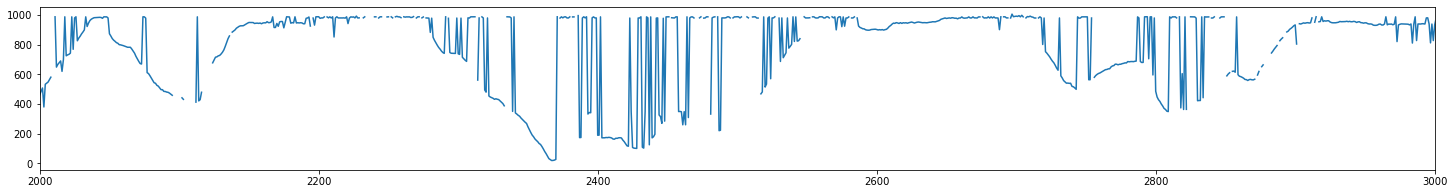

In [13]:
#dist_from_left_wall.plot.line(x = 'frame', y = 'dist_from_left_wall', figsize = (25, 3))
dist_from_left_wall.plot.line(x = 'frame', y = 'dist_from_left_wall', figsize = (25, 3), xlim = (2000, 3000))




<AxesSubplot:>

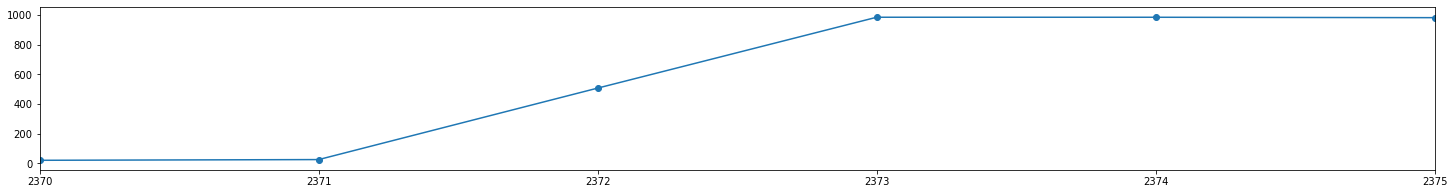

In [14]:
##Should we smooth all the distance data??
left_wall_dist_smoothed = dist_from_left_wall.rolling(3, min_periods=1).median()
left_wall_dist_smoothed.plot.line(x = 'frame', y = 'dist_from_left_wall', marker='o', figsize = (25, 3), xlim = (2370, 2375))



## Velocity

In [15]:
### I am not 100% sure this is correct so someone should double check this

def get_derivative(df, x, y):
    df['dx'] = df[x].diff()
    df['dy'] = df[y].diff()
    #slope = rise/run
    df['dist_traveled_by_frame'] = df['dy']/df['dx']
    return df

In [16]:
def smooth_data(df, window):
    df_smoothed = df.rolling(window).median()
    return df_smoothed

def get_velocity(df, sub1, body_part1):
    dist_list = []
    for i in range(len(df)-1):
        dist_traveled = euclidean_distance(df[sub1+'_'+body_part1+'_x'][i], df[sub1+'_'+body_part1+'_y'][i], df[sub1+'_'+body_part1+'_x'][i+1], df[sub1+'_'+body_part1+'_y'][i+1])
        dist_list.append(dist_traveled)
    dist_df = pd.DataFrame(dist_list)
    #median smooth
    distance_smoothed = smooth_data(dist_df, 3)
    #format this dataset so it makes sense....
    distance_smoothed.columns = ['distance_traveled']
    distance_smoothed['frame'] = df['frame']
    #derive the velocity from the distance traveled over frames
    velocity = get_derivative(distance_smoothed, x = 'frame', y = 'distance_traveled')
    return velocity

def get_velocity_between_mice(df, sub1, body_part1, sub2, body_part2):
    distance = get_distance_between_mice(df, sub1, body_part1, sub2, body_part2)
    dist_df = pd.DataFrame(distance)
    distance_smoothed = smooth_data(dist_df, 3)
    #format this dataset so it makes sense....
    distance_smoothed.columns = ['distance_between_subs']
    distance_smoothed['frame'] = df['frame']
    # #derive the velocity from the distance traveled over frames
    velocity = get_derivative(distance_smoothed, x = 'frame', y = 'distance_between_subs')
    return distance_smoothed

def clean_velocity(df):
    if 'distance_traveled' in df.columns:
        df = df.drop(columns = ['distance_traveled', 'frame', 'dx', 'dy'])
        df['dist_traveled_by_frame'] = df['dist_traveled_by_frame'].abs()
    elif 'distance_between_subs' in df.columns:
        df = df.drop(columns = ['distance_between_subs', 'frame', 'dx', 'dy'])
        #NOTE thaht we do not take the absolute value here 
        # because we want to know if the mice are moving towards or away from each other
        df['dist_traveled_by_frame'] = df['dist_traveled_by_frame']
        #change the column name to be more descriptive
        df.rename(columns={'dist_traveled_by_frame':'dist_between_mice_by_frame'}, inplace=True)
    return df

<AxesSubplot:>

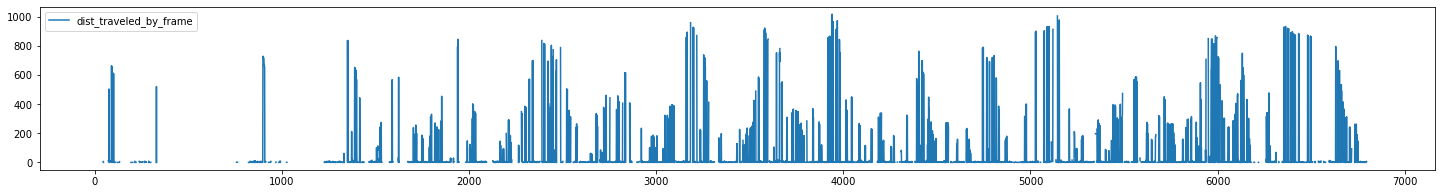

In [17]:
speed_data = get_velocity(sample_data, 'testsubject', 'nose')
velocity = clean_velocity(speed_data)

velocity.plot.line(y = 'dist_traveled_by_frame', figsize = (25, 3))

<AxesSubplot:>

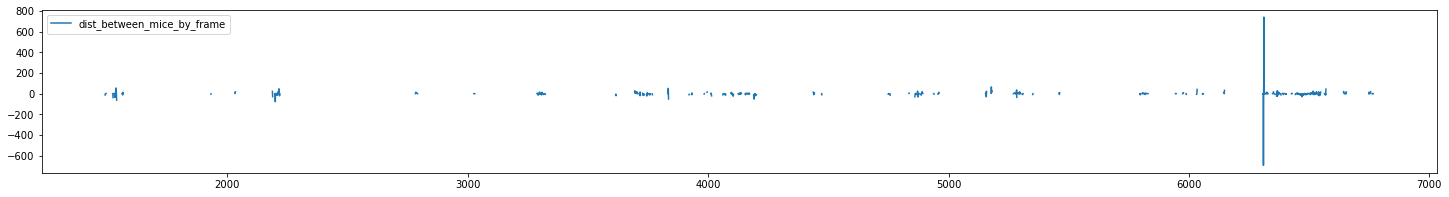

In [18]:
delta_dif_between_mice = get_velocity_between_mice(sample_data, 'testsubject', 'midpoint', 'intruder', 'midpoint')
velocity_between_mice = clean_velocity(delta_dif_between_mice)

velocity_between_mice.plot.line(y ='dist_between_mice_by_frame', figsize = (25, 3))

## Orientation

In [31]:
def get_vector_lengths(df):
    intruder_midpoint = np.array([df['intruder_midpoint_x'], df['intruder_midpoint_y']])
    testsubject_midpoint = np.array([df['testsubject_midpoint_x'], df['testsubject_midpoint_y']])
    testsubject_nose = np.array([df['testsubject_nose_x'], df['testsubject_nose_y']])
    midpoint_to_midpoint = intruder_midpoint - testsubject_midpoint
    midpoint_to_nose = testsubject_nose - testsubject_midpoint
    return midpoint_to_midpoint, midpoint_to_nose

def get_angles(midpoint_to_midpoint, midpoint_to_nose):
    orientation_list = []
    for i in range(midpoint_to_midpoint.shape[1]-1):
        BA = np.reshape(midpoint_to_nose[:,i:i+1], (2,))
        BC = np.reshape(midpoint_to_midpoint[:,i:i+1], (2,))
        cosine_angle = np.dot(BA, BC/ (np.linalg.norm(BA) * np.linalg.norm(BC)))
        angle = np.arccos(cosine_angle)
        orientation_list.append(np.degrees(angle))
    orientation_df = pd.DataFrame(orientation_list)
    orientation_df.columns = ['orientation_to_intruder']
    return orientation_df


### Finds the angle of orientation between the test subject and the intruder
def get_test_orientation_to_intruder(df):
    midpoint_to_midpoint, midpoint_to_nose = get_vector_lengths(df)
    theta = get_angles(midpoint_to_midpoint, midpoint_to_nose)
    return theta

In [66]:
theta = get_test_orientation_to_intruder(sample_data)

pandas.core.frame.DataFrame

<AxesSubplot:>

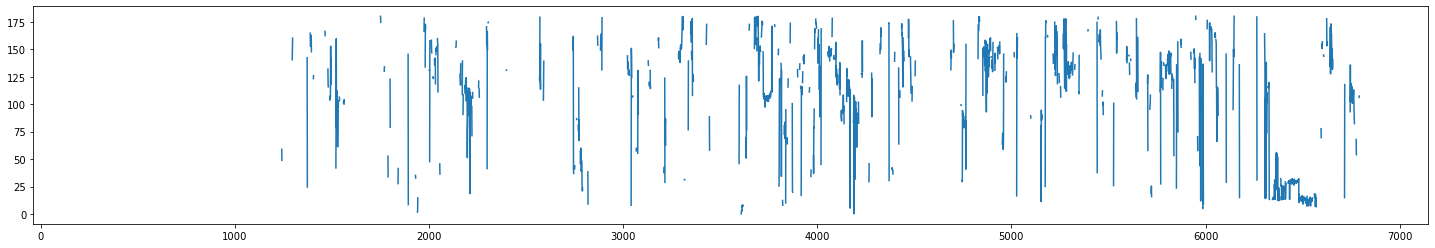

In [33]:
theta['orientation_to_intruder'].plot.line(figsize = (25, 4))

## FINAL PARAMETERS PULLED

In [45]:
features_extracted = ['dist_between_mice', 'intruder_investigation',
              'nose_to_nose_investigation', 'dist_from_left_wall',
              'test_subject_rearing', 'intruder_rearing',
              'test_subject_velocity', 'intruder_velocity',
              'velocity_between_mice', 'orientation_to_intruder']

print(features_extracted)

['dist_between_mice', 'intruder_investigation', 'nose_to_nose_investigation', 'dist_from_left_wall', 'test_subject_rearing', 'intruder_rearing', 'test_subject_velocity', 'intruder_velocity', 'velocity_between_mice', 'orientation_to_intruder']


In [75]:
#between centroid distance
dist_between_mice = get_distance_between_mice(sample_data, 'testsubject', 'midpoint', 'intruder', 'midpoint')

#distance between test subject rear and intruder nose
intruder_investigation = get_distance_between_mice(sample_data, 'testsubject', 'tailbase', 'intruder', 'nose')

#distance between test subject nose and intruder nose
nose_to_nose_investigation = get_distance_between_mice(sample_data, 'testsubject', 'nose', 'intruder', 'nose')

#distance from the left edge of the arena
dist_from_left_wall = get_distance_between_edge(sample_data, 'testsubject', 'nose', 'left')

#rearing
test_subject_rearing = get_distance_between_edge(sample_data, 'testsubject', 'nose', 'bottom')
intruder_rearing = get_distance_between_edge(sample_data, 'intruder', 'nose', 'bottom')

#Velocity of the test subject
test_subject_speed_data = get_velocity(sample_data, 'testsubject', 'midpoint')
test_subject_velocity = clean_velocity(test_subject_speed_data)

#Velocity of the intruder subject
intruder_speed_data = get_velocity(sample_data, 'intruder', 'midpoint')
intruder_velocity = clean_velocity(intruder_speed_data)

#distance between test subject and intruder over time
delta_dif_between_mice = get_velocity_between_mice(sample_data, 'testsubject', 'midpoint', 'intruder', 'midpoint')
velocity_between_mice = clean_velocity(delta_dif_between_mice)

#orientation of the test mouse to the intruder (measured in degrees)
orientation_to_intruder = get_test_orientation_to_intruder(sample_data)


In [153]:
def extract_features(df):
    feature_list = []

    #between centroid distance
    dist_between_mice = get_distance_between_mice(df, 'testsubject', 'midpoint', 'intruder', 'midpoint')
    dist_between_mice.columns = ['dist_between_mice']
    feature_list.append(dist_between_mice)

    #distance between test subject rear and intruder nose
    intruder_investigation = get_distance_between_mice(df, 'testsubject', 'tailbase', 'intruder', 'nose')
    intruder_investigation.columns = ['intruder_investigation']
    feature_list.append(intruder_investigation)

    #distance between test subject nose and intruder nose
    nose_to_nose_investigation = get_distance_between_mice(df, 'testsubject', 'nose', 'intruder', 'nose')
    nose_to_nose_investigation.columns = ['nose_to_nose_investigation']
    feature_list.append(nose_to_nose_investigation)

    #distance from the left edge of the arena
    dist_from_left_wall = get_distance_between_edge(df, 'testsubject', 'nose', 'left')
    dist_from_left_wall.columns = ['dist_from_left_wall']
    feature_list.append(dist_from_left_wall)

    #test_subject_rearing
    test_subject_rearing = get_distance_between_edge(df, 'testsubject', 'nose', 'bottom')
    test_subject_rearing.columns = ['test_subject_rearing']
    feature_list.append(test_subject_rearing)

    #intruder_rearing
    intruder_rearing = get_distance_between_edge(df, 'intruder', 'nose', 'bottom')
    intruder_rearing.columns = ['intruder_rearing']
    feature_list.append(intruder_rearing)

    #Velocity of the test subject
    test_subject_speed_data = get_velocity(df, 'testsubject', 'midpoint')
    test_subject_velocity = clean_velocity(test_subject_speed_data)
    test_subject_velocity.columns = ['test_subject_velocity']
    feature_list.append(test_subject_velocity)

    #Velocity of the intruder subject
    intruder_speed_data = get_velocity(df, 'intruder', 'midpoint')
    intruder_velocity = clean_velocity(intruder_speed_data)
    intruder_velocity.columns = ['intruder_velocity']
    feature_list.append(intruder_velocity)

    #distance between test subject and intruder over time
    delta_dif_between_mice = get_velocity_between_mice(df, 'testsubject', 'midpoint', 'intruder', 'midpoint')
    velocity_between_mice = clean_velocity(delta_dif_between_mice)
    velocity_between_mice.columns = ['velocity_between_mice']
    feature_list.append(velocity_between_mice)

    #orientation of the test mouse to the intruder (measured in degrees)
    orientation_to_intruder = get_test_orientation_to_intruder(df)
    orientation_to_intruder.columns = ['orientation_to_intruder']
    feature_list.append(orientation_to_intruder)

    return feature_list

def compile_features(feature_list):
    compiled_features = pd.concat(feature_list, axis = 1)
    return compiled_features



In [156]:
raw_behaviors = extract_features(sample_data)
compiled_features = compile_features(raw_behaviors)

compiled_features

,dist_between_mice,intruder_investigation,nose_to_nose_investigation,dist_from_left_wall,test_subject_rearing,intruder_rearing,test_subject_velocity,intruder_velocity,velocity_between_mice,orientation_to_intruder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6826,NaN,NaN,NaN,NaN,NaN,605.034,NaN,NaN,NaN,NaN
6827,NaN,NaN,200.439930,731.882,716.036,608.679,NaN,NaN,NaN,NaN
6828,NaN,NaN,196.993567,731.953,708.083,604.995,NaN,NaN,NaN,NaN
6829,NaN,NaN,NaN,NaN,NaN,605.964,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='dist_between_mice', ylabel='nose_to_nose_investigation'>

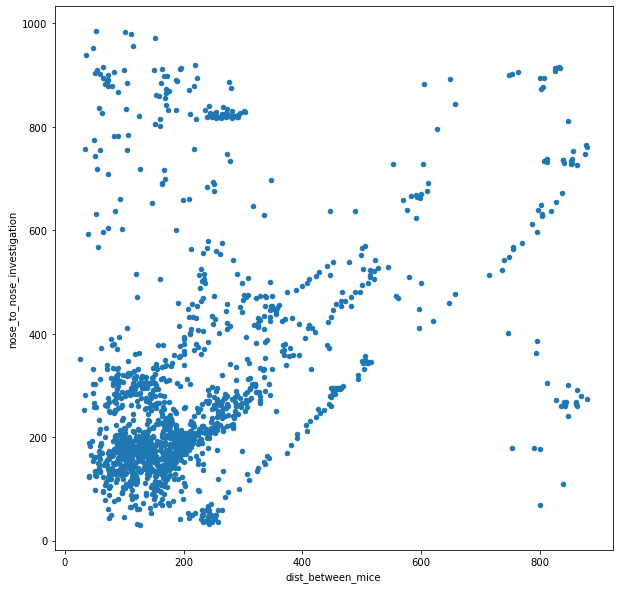

In [161]:
compiled_features.plot.scatter(x = 'dist_between_mice', y = 'nose_to_nose_investigation', figsize = (10, 10))

## Shenanigans below....

In [ ]:
def find_cross_length(l, h):
    cross = np.sqrt((l**2)+(h**2))
    return cross

In [ ]:
find_cross_length(1173, 800)

1419.8341452437323

In [ ]:
import sklearn

from scipy.ndimage import gaussian_filter

#sklearn.preprocessing.MinMaxScaler

In [ ]:
gaussian_velocity = gaussian_filter(velocity, sigma=1)

<AxesSubplot:>

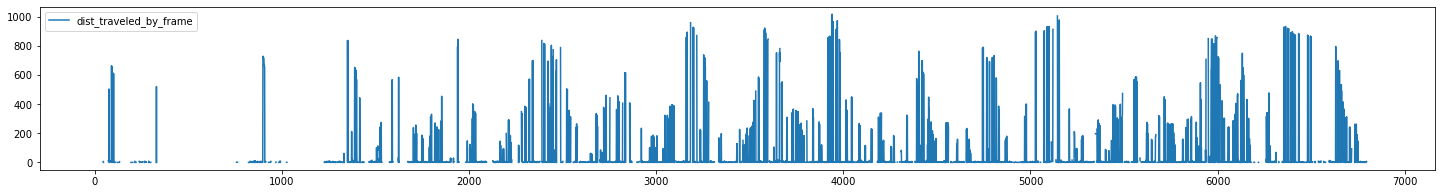

In [ ]:
velocity.plot.line(y = 'dist_traveled_by_frame', figsize = (25, 3))

In [ ]:
'plot gaussian_velocity here'
gaussian_velocity = pd.DataFrame(gaussian_velocity)

gaussian_velocity.plot.line(y ='dist_between_mice_by_frame', figsize = (25, 3))

KeyError: 'dist_between_mice_by_frame'